In [16]:
import torch
import torchvision.transforms as transforms
import torch.utils.data as data
import os
import pickle
import numpy as np
import nltk
from PIL import Image
import random
import json
import h5py
import pandas as pd

In [17]:
path = os.getcwd()
os.chdir(path + '/cnn_rnn_models/cnn_rnn_vinalys')

In [3]:
import dataHandler

In [4]:
root_img=path + '/data/Images/'
caption_root= path +'/data/'

## caption 불러오기

In [5]:
df = pd.read_csv(caption_root+'captions.txt', sep=",", header=0)

In [6]:
df['file_paths']=root_img+df['image']

In [7]:
k=json.loads(df.to_json())

## 텍스트 전처리

In [8]:
os.chdir(path + '/data_preprocessing')

In [9]:
import build_vocab

In [10]:
# tokenize 해준다
build_vocab.build_vocab('caption.json', 40)

In [11]:
df = pd.read_json(path+'/data_preprocessing/caption.json')

In [12]:
imgs = json.load(open(path+'/data_preprocessing/caption.json', 'r'))


In [13]:
len(imgs['file_paths'])

40455

In [29]:
for i, z in enumerate(imgs['file_paths'].values()):
    print(i, z)

0 /home/wondo94/0conf/20210520 image captioning/radcap_project-master/data/Images/1000268201_693b08cb0e.jpg
1 /home/wondo94/0conf/20210520 image captioning/radcap_project-master/data/Images/1000268201_693b08cb0e.jpg
2 /home/wondo94/0conf/20210520 image captioning/radcap_project-master/data/Images/1000268201_693b08cb0e.jpg
3 /home/wondo94/0conf/20210520 image captioning/radcap_project-master/data/Images/1000268201_693b08cb0e.jpg
4 /home/wondo94/0conf/20210520 image captioning/radcap_project-master/data/Images/1000268201_693b08cb0e.jpg
5 /home/wondo94/0conf/20210520 image captioning/radcap_project-master/data/Images/1001773457_577c3a7d70.jpg
6 /home/wondo94/0conf/20210520 image captioning/radcap_project-master/data/Images/1001773457_577c3a7d70.jpg
7 /home/wondo94/0conf/20210520 image captioning/radcap_project-master/data/Images/1001773457_577c3a7d70.jpg
8 /home/wondo94/0conf/20210520 image captioning/radcap_project-master/data/Images/1001773457_577c3a7d70.jpg
9 /home/wondo94/0conf/202105

In [16]:
imgs['caption']['0']

'A child in a pink dress is climbing up a set of stairs in an entry way .'

## 이미지 불러오기

In [14]:
os.chdir(path + '/cnn_rnn_models/cnn_rnn_vinalys')

In [15]:
import model_cnn_rnn

In [16]:
model_cnn_rnn.EncoderCNN(152)

EncoderCNN(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64

In [17]:
model_cnn_rnn.DecoderRNN(152, 20, 40, 1)

DecoderRNN(
  (embed): Embedding(40, 152)
  (lstm): LSTM(152, 20, batch_first=True)
  (linear): Linear(in_features=20, out_features=40, bias=True)
)

In [18]:
imgs

{'image': {'0': '1000268201_693b08cb0e.jpg',
  '1': '1000268201_693b08cb0e.jpg',
  '2': '1000268201_693b08cb0e.jpg',
  '3': '1000268201_693b08cb0e.jpg',
  '4': '1000268201_693b08cb0e.jpg',
  '5': '1001773457_577c3a7d70.jpg',
  '6': '1001773457_577c3a7d70.jpg',
  '7': '1001773457_577c3a7d70.jpg',
  '8': '1001773457_577c3a7d70.jpg',
  '9': '1001773457_577c3a7d70.jpg',
  '10': '1002674143_1b742ab4b8.jpg',
  '11': '1002674143_1b742ab4b8.jpg',
  '12': '1002674143_1b742ab4b8.jpg',
  '13': '1002674143_1b742ab4b8.jpg',
  '14': '1002674143_1b742ab4b8.jpg',
  '15': '1003163366_44323f5815.jpg',
  '16': '1003163366_44323f5815.jpg',
  '17': '1003163366_44323f5815.jpg',
  '18': '1003163366_44323f5815.jpg',
  '19': '1003163366_44323f5815.jpg',
  '20': '1007129816_e794419615.jpg',
  '21': '1007129816_e794419615.jpg',
  '22': '1007129816_e794419615.jpg',
  '23': '1007129816_e794419615.jpg',
  '24': '1007129816_e794419615.jpg',
  '25': '1007320043_627395c3d8.jpg',
  '26': '1007320043_627395c3d8.jpg',
  

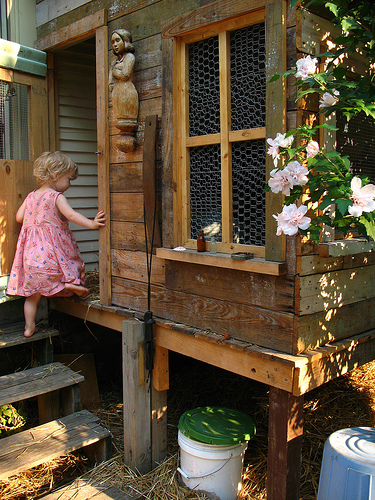

In [19]:
im = Image.open(root_img+'1000268201_693b08cb0e.jpg') # 이미지 불러오기
im.show() # 이미지 보여주기

In [20]:
df['caption'][0]

'A child in a pink dress is climbing up a set of stairs in an entry way .'

In [21]:
os.chdir(path + '/data_preprocessing')

In [22]:
path + '/data_preprocessing'

'/home/wondo94/0conf/20210520 image captioning/radcap_project-master/data_preprocessing'

## tokenize 시키기

In [23]:
%run build_vocab.py

Total vocabulary size: 1860
Saved the vocabulary wrapper to '/home/wondo94/0conf/20210520 image captioning/radcap_project-master/data_preprocessing/vocab.pkl'


In [24]:
with open('vocab.pkl', 'rb') as f:
    data = pickle.load(f)

In [25]:
data

In [26]:
data = pd.read_pickle('vocab.pkl')

In [27]:
data

## data preprocessing

In [1]:
import torch
import torchvision.transforms as transforms
import torch.utils.data as data
import os
import pickle
import numpy as np
import nltk
from PIL import Image
import random
import json
import h5py
import pandas as pd

In [2]:
path = os.getcwd()
os.chdir(path + '/cnn_rnn_models/cnn_rnn_vinalys')

In [3]:
root_img=path + '/data/Images/'
caption_root= path +'/data/'

In [4]:
os.chdir(path + '/cnn_rnn_models/cnn_rnn_vinalys')

In [5]:
import dataHandler

In [6]:
root='/home/wondo94/0conf/20210520 image captioning/radcap_project-master/data/Images/'
json_imgs='/home/wondo94/0conf/20210520 image captioning/radcap_project-master/data_preprocessing/'
vocab='/home/wondo94/0conf/20210520 image captioning/radcap_project-master/data_preprocessing/vocab.pkl'
transform=None
num_workers=1
batch_size=20
shuffle=True


In [7]:
a=dataHandler.FlickrDataset(root_img, path + '/data_preprocessing', data)

In [8]:
a

In [9]:
dataHandler.get_loader(root=root, json_imgs=json_imgs,
                       vocab=vocab, transform=None, batch_size=batch_size,
                       shuffle=True, num_workers=num_workers)

In [10]:
dataHandler.get_loader(root_img,  path + '/data_preprocessing', data, transform=None, batch_size=20 ,shuffle=None, num_workers=10)

In [11]:
%run dataHandler.py

### 학습

In [12]:
os.chdir(path)

In [13]:
%run train.py

Namespace(batch_size=4, caption_path='/home/wondo94/0conf/20210520 image captioning/radcap_project-master/data_preprocessing/', crop_size=64, embed_size=256, hidden_size=512, image_dir='/home/wondo94/0conf/20210520 image captioning/radcap_project-master/data/Images/', learning_rate=0.1, log_step=1000, model_path='./models/', num_epochs=10, num_layers=1, num_workers=2, save_step=10000, vocab_path='/home/wondo94/0conf/20210520 image captioning/radcap_project-master/data_preprocessing/vocab.pkl')
Epoch 0/9
----------


/home/wondo94/.local/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


RuntimeError: CUDA out of memory. Tried to allocate 47.64 GiB (GPU 0; 9.78 GiB total capacity; 474.60 MiB already allocated; 5.59 GiB free; 486.00 MiB reserved in total by PyTorch)

In [58]:
cocoimgs = json.load(open('/home/wondo94/0conf/20210520 image captioning/radcap_project-master/data_preprocessing/caption.json', 'r'))


In [74]:
len_train = int(round(0.7 * len(cocoimgs['image'])))
len_val = int(round(0.20 * len(cocoimgs['image'])))

In [109]:
train_keys=list(cocoimgs['image'].keys())[:len_train]

In [111]:
cocoimgs['image'].keys([train_keys])

TypeError: keys() takes no arguments (1 given)

In [105]:
list[cocoimgs['image'].keys()][:len_train]

TypeError: 'type' object is not subscriptable

In [81]:
list(cocoimgs['image'])

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138'

In [85]:
a=list(cocoimgs['image'])[:len_train]

In [91]:
a=list(cocoimgs['image'].keys())[:len_train]

In [93]:
cocoimgs['image']

{'0': '1000268201_693b08cb0e.jpg',
 '1': '1000268201_693b08cb0e.jpg',
 '2': '1000268201_693b08cb0e.jpg',
 '3': '1000268201_693b08cb0e.jpg',
 '4': '1000268201_693b08cb0e.jpg',
 '5': '1001773457_577c3a7d70.jpg',
 '6': '1001773457_577c3a7d70.jpg',
 '7': '1001773457_577c3a7d70.jpg',
 '8': '1001773457_577c3a7d70.jpg',
 '9': '1001773457_577c3a7d70.jpg',
 '10': '1002674143_1b742ab4b8.jpg',
 '11': '1002674143_1b742ab4b8.jpg',
 '12': '1002674143_1b742ab4b8.jpg',
 '13': '1002674143_1b742ab4b8.jpg',
 '14': '1002674143_1b742ab4b8.jpg',
 '15': '1003163366_44323f5815.jpg',
 '16': '1003163366_44323f5815.jpg',
 '17': '1003163366_44323f5815.jpg',
 '18': '1003163366_44323f5815.jpg',
 '19': '1003163366_44323f5815.jpg',
 '20': '1007129816_e794419615.jpg',
 '21': '1007129816_e794419615.jpg',
 '22': '1007129816_e794419615.jpg',
 '23': '1007129816_e794419615.jpg',
 '24': '1007129816_e794419615.jpg',
 '25': '1007320043_627395c3d8.jpg',
 '26': '1007320043_627395c3d8.jpg',
 '27': '1007320043_627395c3d8.jpg',
 '

In [67]:
cocoimgs['caption']

{'0': 'A child in a pink dress is climbing up a set of stairs in an entry way .',
 '1': 'A girl going into a wooden building .',
 '2': 'A little girl climbing into a wooden playhouse .',
 '3': 'A little girl climbing the stairs to her playhouse .',
 '4': 'A little girl in a pink dress going into a wooden cabin .',
 '5': 'A black dog and a spotted dog are fighting',
 '6': 'A black dog and a tri-colored dog playing with each other on the road .',
 '7': 'A black dog and a white dog with brown spots are staring at each other in the street .',
 '8': 'Two dogs of different breeds looking at each other on the road .',
 '9': 'Two dogs on pavement moving toward each other .',
 '10': 'A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
 '11': 'A little girl is sitting in front of a large painted rainbow .',
 '12': 'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
 '13': 'There is a girl with pigtails 

In [16]:
path

'/home/wondo94/0conf/20210520 image captioning/radcap_project-master'

In [132]:
os.chdir(path)

In [14]:
!python train.py

Traceback (most recent call last):
  File "train.py", line 2, in <module>
    import torch
ImportError: No module named torch


In [18]:
%run train.py

Namespace(batch_size=4, caption_path='/home/wondo94/0conf/20210520 image captioning/radcap_project-master/data_preprocessing/', crop_size=224, embed_size=256, hidden_size=512, image_dir='/home/wondo94/0conf/20210520 image captioning/radcap_project-master/data/Images/', learning_rate=0.01, log_step=10, model_path='./models/', num_epochs=10, num_layers=1, num_workers=2, save_step=1000, vocab_path='/home/wondo94/0conf/20210520 image captioning/radcap_project-master/data_preprocessing/vocab.pkl')
Epoch 0/9
----------


/home/wondo94/.local/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


RuntimeError: CUDA out of memory. Tried to allocate 47.64 GiB (GPU 0; 9.78 GiB total capacity; 474.60 MiB already allocated; 7.69 GiB free; 486.00 MiB reserved in total by PyTorch)

In [1]:
!nvidia-smi

Sat Jun  5 14:51:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.73.01    Driver Version: 460.73.01    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 3080    Off  | 00000000:05:00.0 Off |                  N/A |
|  0%   50C    P8    18W / 320W |   2153MiB / 10016MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 3080    Off  | 00000000:09:00.0 Off |                  N/A |
|  0%   

In [45]:
len(pd.DataFrame(imgs))

40455

In [16]:
len_train = int(round(0.7 * len(pd.DataFrame(imgs))))
len_val = int(round(0.20 * len(pd.DataFrame(imgs))))

NameError: name 'imgs' is not defined

In [47]:
pd.DataFrame(imgs).sample(frac=1).reset_index(drop=True)[:len_train]

image  \
0      3687996569_99163a41c3.jpg   
1      3149038044_c7c94688c6.jpg   
2      3027365101_3818be6e16.jpg   
3      2347921097_f2e35753c0.jpg   
4       186346360_541047336f.jpg   
...                          ...   
28313  2881441125_b580e3dd4b.jpg   
28314   111497985_38e9f88856.jpg   
28315  2632381125_de32bdfdf6.jpg   
28316  3215870337_c92a1a1b2f.jpg   
28317  3067885047_f69d90c35b.jpg   

                                                 caption  
0      Six women dressed in purple , blue , green , o...  
1      two children are playing with a football on th...  
2      A biker is riding along a track element locate...  
3                      The dogs are playing on the bed .  
4      A girl in a bikini top and shorts poses for a ...  
...                                                  ...  
28313  Two children ladle water and a blue watering c...  
28314                  A young man climbs a rocky hill .  
28315  Two large dogs fighting over a Frisbee in the ...  
28316  A crowd of people views newspaper covers in Wa...  
28317   Four girls do backbends while playing outdoors .  

[28318 rows x 2 columns]

In [71]:
a=pd.DataFrame(imgs).sample(frac=1).reset_index(drop=True)[:len_train]

In [79]:
z=a.to_json()

In [81]:
k=json.loads(z)

In [82]:
k

{'image': {'0': '2933637854_984614e18b.jpg',
  '1': '207275121_ee4dfa0bf2.jpg',
  '2': '2896298341_92d718366a.jpg',
  '3': '639120223_7db6bdb61f.jpg',
  '4': '3479050296_65bcea69a0.jpg',
  '5': '3112635165_2d614d7c1a.jpg',
  '6': '3591458156_f1a9a33918.jpg',
  '7': '2358561039_e215a8d6cd.jpg',
  '8': '3585488964_1467945775.jpg',
  '9': '3412036192_d8cd12ed3f.jpg',
  '10': '3549006919_3604bc813e.jpg',
  '11': '3585123310_9a8e94bd2b.jpg',
  '12': '314904143_5a216a192b.jpg',
  '13': '640203018_c0e7175831.jpg',
  '14': '2729685399_56c0e104b1.jpg',
  '15': '237547381_aa17c805e0.jpg',
  '16': '258476074_f28f4a1ae6.jpg',
  '17': '2403078014_4b1d6f8bde.jpg',
  '18': '2125216241_5b265a2fbc.jpg',
  '19': '3484070900_3e76d7fd30.jpg',
  '20': '3275527950_41aca690a1.jpg',
  '21': '486300784_2cc7a770ff.jpg',
  '22': '2269961438_cae7a9c725.jpg',
  '23': '2898304260_a4099a193a.jpg',
  '24': '3439982121_0afc6d5973.jpg',
  '25': '472661386_723aae880b.jpg',
  '26': '293879742_5fe0ffd894.jpg',
  '27': '44

In [54]:
z=a.load()
z= json.load(z)

AttributeError: 'DataFrame' object has no attribute 'load'

In [15]:
!nvidia-smi

Sat Jun  5 15:43:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.73.01    Driver Version: 460.73.01    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 3080    Off  | 00000000:05:00.0 Off |                  N/A |
|  0%   51C    P8    18W / 320W |   4292MiB / 10016MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 3080    Off  | 00000000:09:00.0 Off |                  N/A |
|  0%   

In [19]:
pip install torchvision 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
!CUDA_VISIBLE_DEVICES=1 python train.py

Traceback (most recent call last):
  File "train.py", line 2, in <module>
    import torch
ImportError: No module named torch


In [15]:
!pip list

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Package                Version
---------------------- -------------------
alembic                1.4.0
argon2-cffi            20.1.0
asn1crypto             0.24.0
async-generator        1.10
attrs                  21.2.0
Automat                0.6.0
backcall               0.2.0
bleach                 3.3.0
cached-property        1.5.2
certifi                2018.1.18
certipy                0.1.3
cffi                   1.14.5
chardet                3.0.4
click                  8.0.1
colorama               0.3.7
command-not-found      0.3
configobj              5.0.6
constantly             15.1.0
cryptography           2.1.4
dataclasses            0.8
decorator              5.0.9
defusedxml             0.7.1
distro-info            0.18ubuntu0.18.04.1
entrypoints            0.3
fail2ban               0.10.2